In [1]:
# 查看必要库的版本
import sys
import matplotlib as mlp
import seaborn as sns
import brewer2mpl 


print(mlp.__version__)
print(sns.__version__)
print(sys.version)
print(mlp.get_configdir())

3.1.3
0.10.0
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
C:\Users\Nick\.matplotlib


In [2]:
# 导入需要的绘图

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

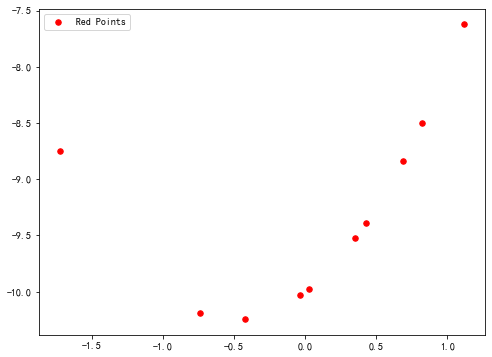

In [3]:
#绘制超简单的散点图：变量x1与x2的关系

#定义横轴和纵轴数据
x = np.random.randn(10) #随机生成10个数
y =  x**2 + x - 10

#确定画布，参数figsize(width, height)
plt.figure(figsize=(8,6))

#绘图
#x，y：表示的是大小为(n,)的数组，也就是我们即将绘制散点图的数据点
plt.scatter(x,y,                    # 横坐标，纵坐标
            s=30,                    # 数据点的尺寸大小
            c="red",                # 数据点的颜色
            label = "Red Points"   # 标签
           )

#装饰图形
plt.legend() #显示图例,和scatter函数的label参数标签联用
plt.show() #让图形显示

### 1. 散点图
Scatteplot是用于研究两个变量之间关系的经典和基本图。如果数据中有多个组，则可能需要以不同颜色可视化每个组。在Matplotlib，你可以方便地使用。

In [4]:
# Import dataset 
midwest = pd.read_csv("midwest_filter.csv")#美国加州人口分析数据
#探索数据
print(midwest.shape)#查看数据维度
print(midwest.columns)#查看所有的列
print(midwest.dtypes)  #查看各列的数据类型
midwest.head(3)

(332, 29)
Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category',
       'dot_size'],
      dtype='object')
PID                       int64
county                   object
state                    object
area                    float64
poptotal                  int64
popdensity              float64
popwhite                  int64
popblack                  int64
popamerindian             int64
popasian                  int64
popother                  int64
percwhite               float64
percblack               float64
percamerindan           float64
percasian               float64
percother               float64
po

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385


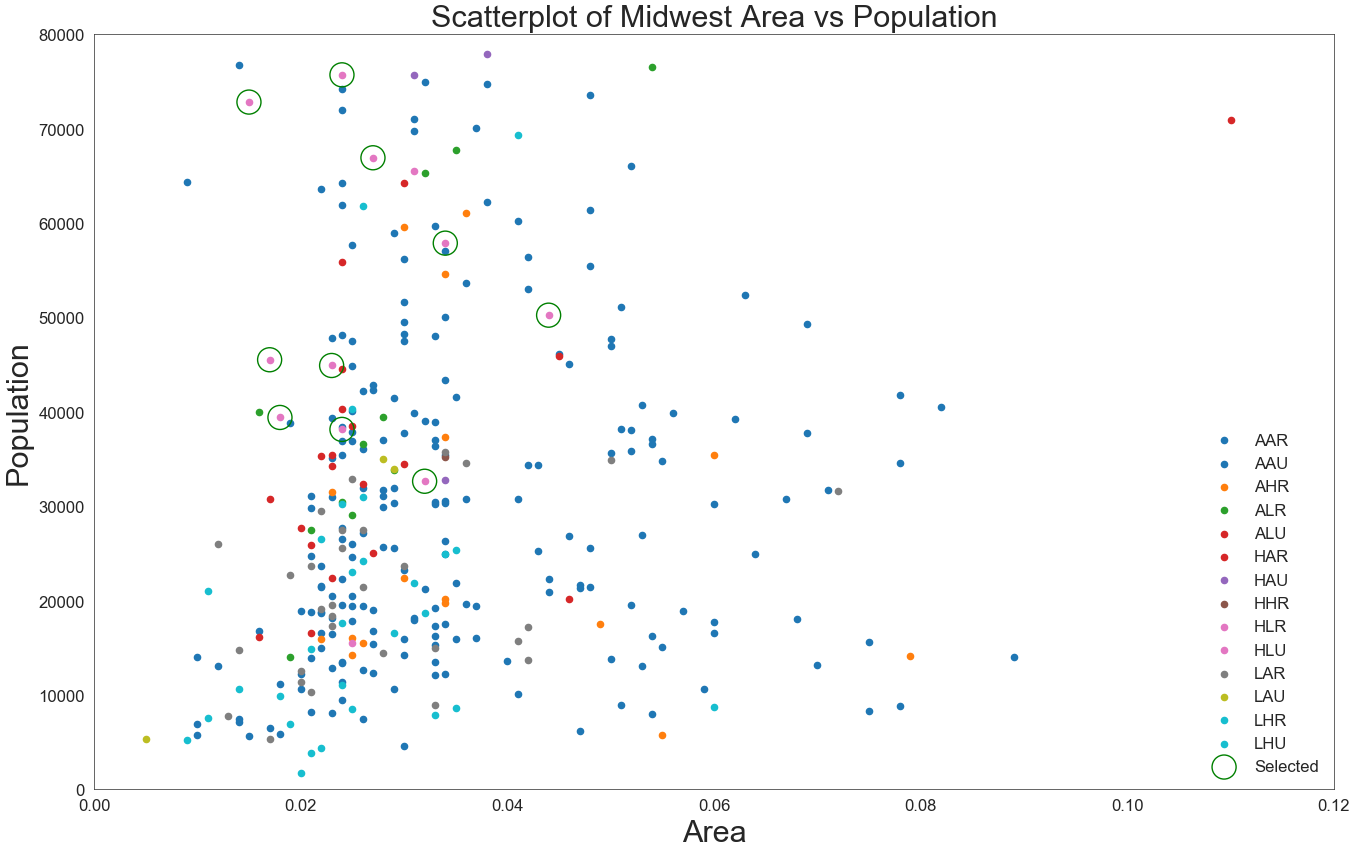

In [9]:
# 预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,           #子图上的标题字体大小
          'legend.fontsize': med,           #图例的字体大小
          'figure.figsize': (16, 10),      #图像的画布大小
          'axes.labelsize': med,          #标签的字体大小
          'xtick.labelsize': med,        #x轴上的标尺的字体大小
          'ytick.labelsize': med,       #y轴上的标尺的字体大小
          'figure.titlesize': large}   #整个画布的标题字体大小
plt.rcParams.update(params)           #设定各种各样的默认属性
#plt.style.use('seaborn-whitegrid')   #设定整体风格
plt.style.use(['science','no-latex']) #使用science，没有latex渲染模式
sns.set_style("white")              #设定整体背景风格

#指定数据类型构建分类数据 ,dtype="category"
# 准备标签列表和颜色列表,有多少标签就有多少颜色
categories = np.unique(midwest['category']) #csv文件中，'category'这一列的去重值,np.unique()是去除数组中的重复数字，并进行排序之后输出。
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))] # cm.tab10（） colormap

# 建立画布
plt.figure(figsize=(16, 10),    #绘图尺寸
           dpi=100,            #图像分辨率
           facecolor='w',     #图像的背景颜色，设置为白色，默认也是白色
           edgecolor='k'     #图像的边框颜色，设置为黑色，默认也是黑色
          )

# 循环绘图 画出不同地区人口和地区面积的点图，y方向表示人口增长方向，x方向表示面积增长方向
# 我们可以输入横纵坐标，也可以输入横纵坐标的名字，然后使用data这个参数来传入全数据集
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', #x轴为面积，y轴为人口总数
                data=midwest.loc[midwest.category==category, :], #指定的数据
                s=20, #点的大小
                c=np.array(colors[i]).reshape(1,-1), #点的颜色
                label=str(category)) #点的标签类型

#HLU high low 高学历，低贫困的地方
plt.scatter("area","poptotal",
           data = midwest.loc[midwest.category == "HLU",:],
            s=300,
            facecolors="None",  # 点的填充颜色
            edgecolors="green",   # 点的边框颜色
            label = "Selected")

# 对图像进行装饰
# plt.gca() 获取当前的子图，如果当前没有任何子图的话，就帮我创建一个新的子图
plt.gca().set(xlim=(0, 0.12), ylim=(0, 80000)) #控制横纵坐标的范围
plt.xticks(fontsize=12)                       #坐标轴上的标尺的字的大小
plt.yticks(fontsize=12)
plt.ylabel('Population',fontsize=22)         # 坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) #整个图像的标题和字体的大小
plt.legend(fontsize=12)                    #图例的字体大小
plt.show()

### 2. 带边界的气泡图
有时，您希望在边界内显示一组点以强调其重要性。在此示例中，您将从应该被环绕的数据帧中获取记录，并将其传递给下面的代码中描述的记录。encircle()

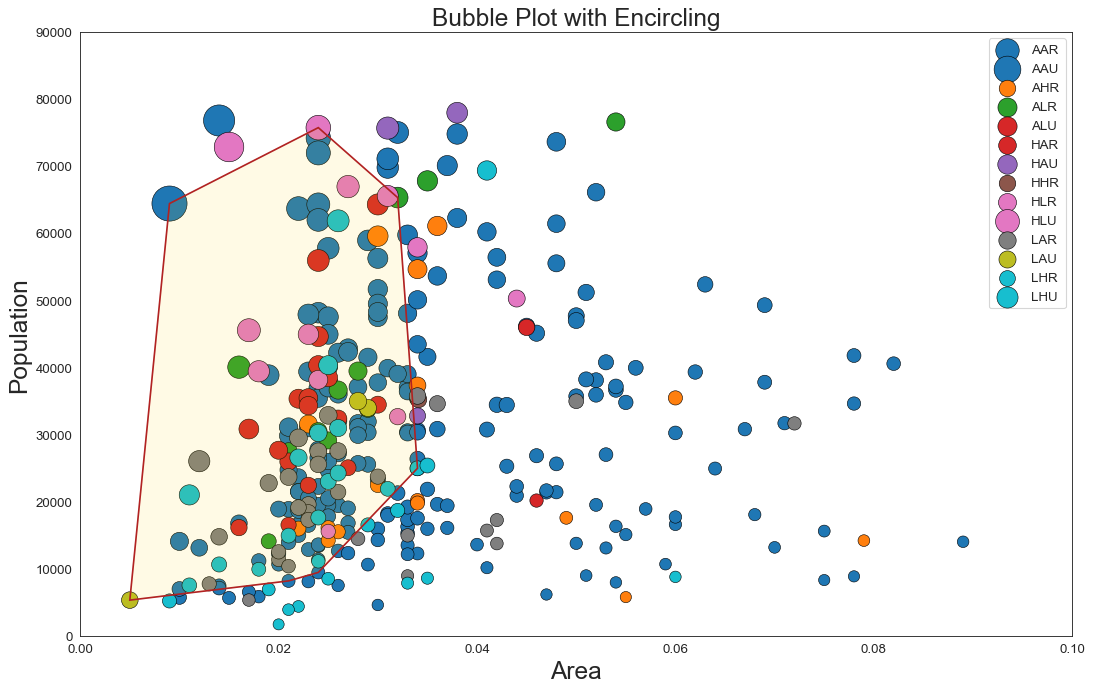

In [6]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings# warnings.simplefilter( ignore )
sns.set_style("white")

# As many colors as there are unique midwest[ category ]
categories = np.unique(midwest['category' ])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor= 'w', edgecolor='k' )    

for i, category in enumerate(categories):
    plt.scatter('area' ,'poptotal' , data=midwest.loc[midwest.category==category, :], 
                s= 'dot_size' , c=np.array(colors[i]).reshape(1,-1), label=str(category), edgecolors= 'black' , linewidths=.5)

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN' , :]  #选取印第安纳州的所有数据

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000))#控制横纵坐标的范围    
plt.xticks(fontsize=12); plt.yticks(fontsize=12)   #坐标轴上的标尺的字的大小
plt.ylabel('Population',fontsize=22)         # 坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Bubble Plot with Encircling", fontsize=22)#气泡环绕图
plt.legend(fontsize=12)    
plt.show()

### 3. 带线性回归最佳拟合线的散点图
如果你想了解两个变量如何相互改变，那么最合适的线就是要走的路。下图显示了数据中各组之间最佳拟合线的差异。
要禁用分组并仅为整个数据集绘制一条最佳拟合线，请从下面的调用中删除该参数。

In [7]:
#Import Data
df = pd.read_csv("mpg_ggplot2.csv")
print(df.shape)
print(df.dtypes)
df.head()


(234, 11)
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Text(0.5, 1, 'Scatterplot with line of best fit grouped by number of cylinders')

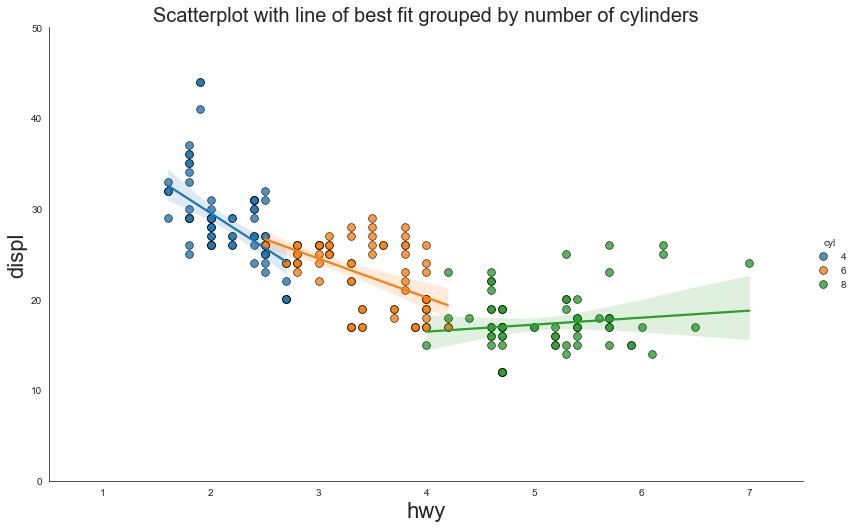

In [11]:
df_select = df.loc[df.cyl.isin([4,6,8]), :]#选取'cyl'列的值是4，6,8的数据

# Plot
sns.set_style("white")
#lmplot是用来绘制回归图的，通过lmplot我们可以直观地总览数据的内在关系
#参数，order:控制进行回归的幂次（一次以上即是多项式回归）,order = 1 一元线性回归   >1 是多项式回归
#gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select,palette="Set1")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, #hue:用于分类，data选择的数据，data也可以选择所有的
                     height=7, aspect=1.6, robust=True,palette= 'tab10',order=1 ,
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors= 'black' ))
# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.ylabel('displ',fontsize=22)         # 坐标轴上的标题和字体大小
plt.xlabel('hwy',fontsize=22)
#plt.legend(fontsize=12)    
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)

每个回归线都在自己的列中,
或者，您可以在其自己的列中显示每个组的最佳拟合线。你可以通过在里面设置参数来实现这一点。

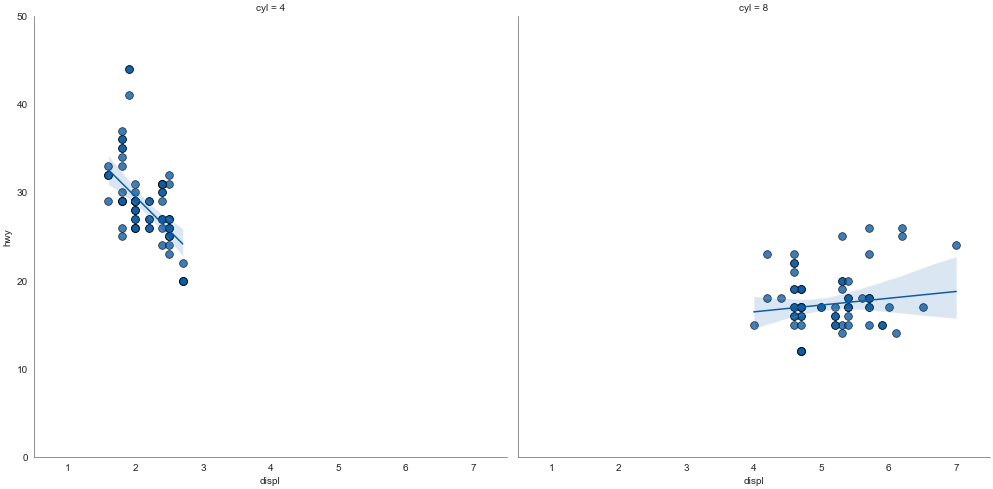

In [13]:
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=7, 
                     robust=True, 
                     palette= 'Set2' , 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors= 'k' ))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))  
#plt.style.use(['science','no-latex']) #使用science，没有latex渲染模式
plt.show()

### 4. 抖动图
通常，多个数据点具有完全相同的X和Y值。结果，多个点相互绘制并隐藏。为避免这种情况，请稍微抖动点，以便您可以直观地看到它们。这很方便使用

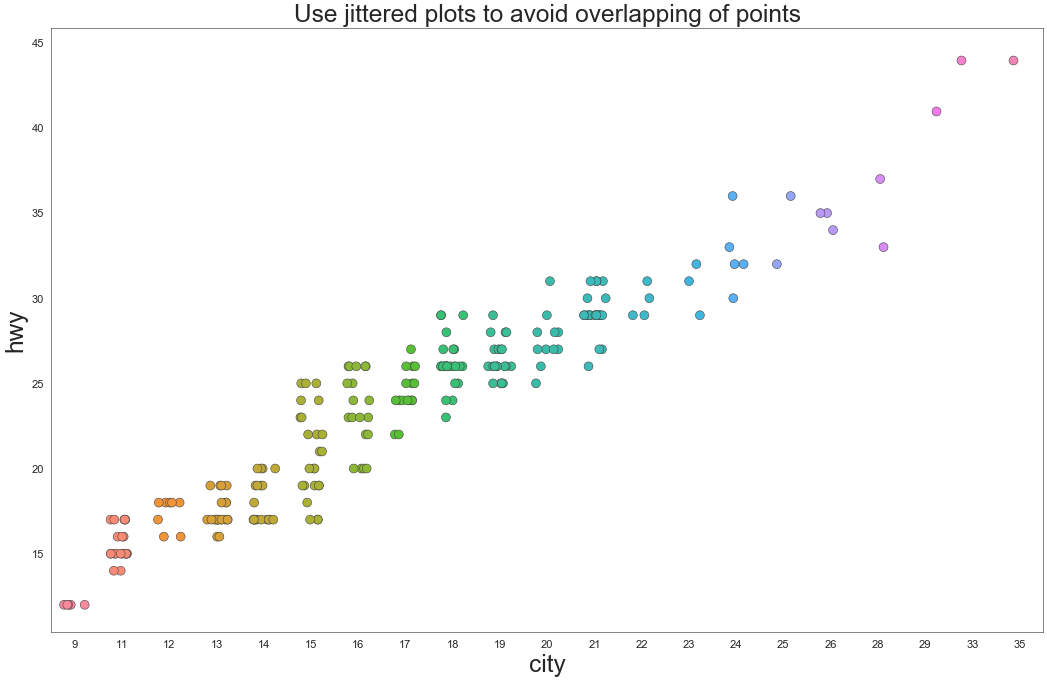

In [14]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)#按照不同类别对样本数据进行分布散点图绘制,size点的大小

# Decorations
plt.title( 'Use jittered plots to avoid overlapping of points' , fontsize=22)
plt.ylabel('hwy',fontsize=22)         # 坐标轴上的标题和字体大小
plt.xlabel('cty',fontsize=22)
plt.style.use(['science','no-latex']) 
plt.show()

### 5. 计数图
避免点重叠问题的另一个选择是增加点的大小，这取决于该点中有多少点。因此，点的大小越大，周围的点的集中度就越大。

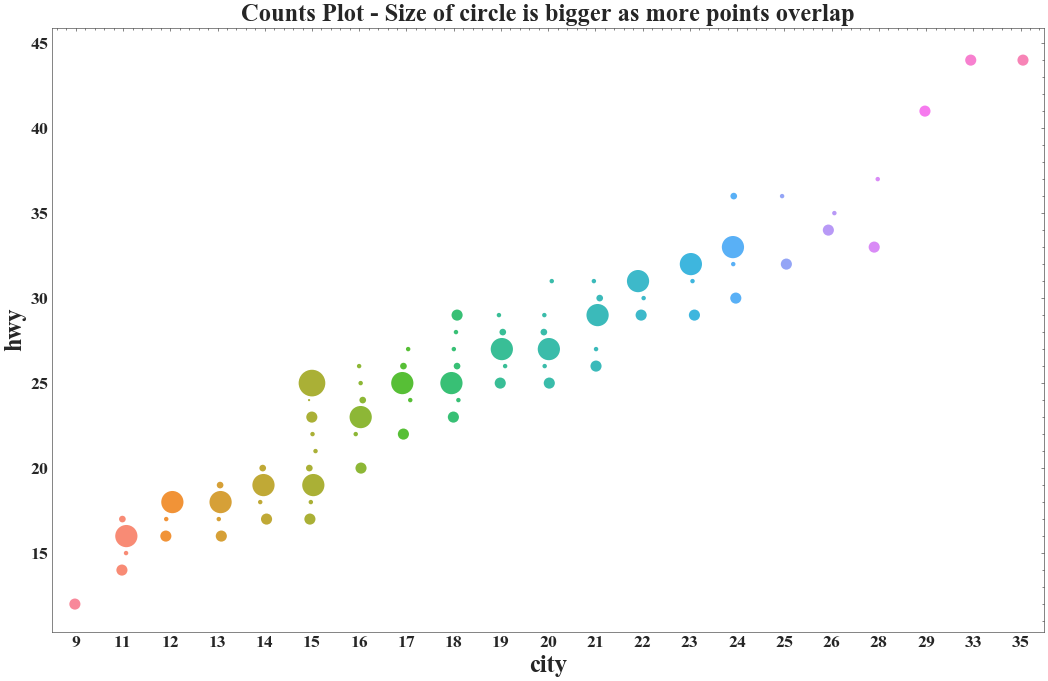

In [54]:
df_counts = df.groupby([ 'hwy' ,'cty' ]).size().reset_index(name= 'counts' )
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)#size=每个不同点的计数*2

# Decorations
plt.ylabel('hwy',fontsize=22)         # 坐标轴上的标题和字体大小
plt.xlabel('city',fontsize=22)
plt.style.use(['science','no-latex'])
plt.title('Counts Plot - Size of circle is bigger as more points overlap' , fontsize=22)
plt.show()

### 6. 边缘直方图
边缘直方图具有沿X和Y轴变量的直方图。这用于可视化X和Y之间的关系以及单独的X和Y的单变量分布。该图如果经常用于探索性数据分析（EDA）。

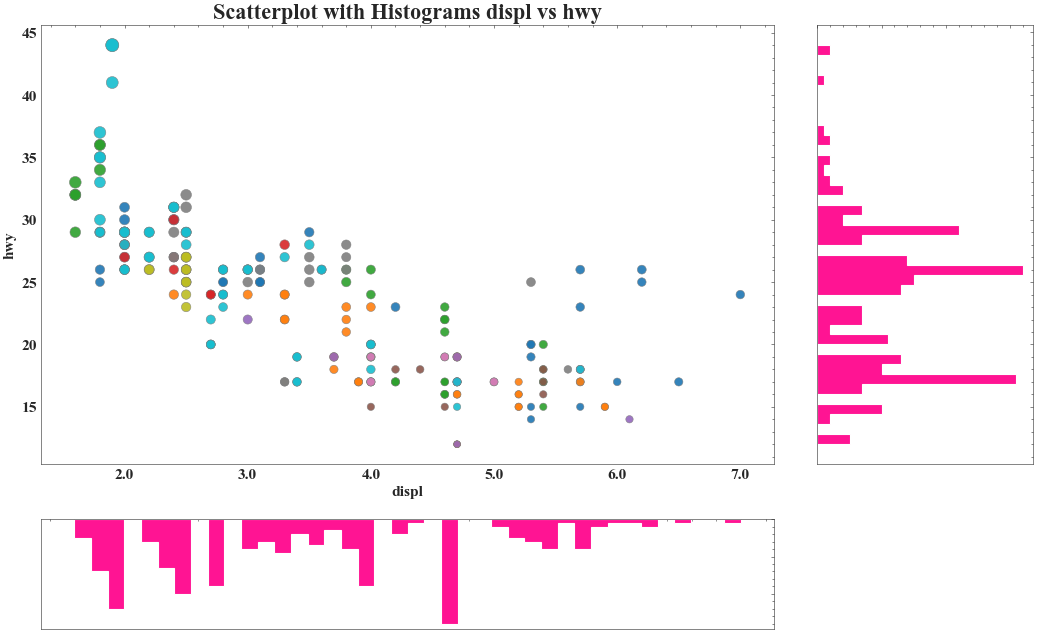

In [15]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])#横纵坐标为空
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ' , 'hwy' , s=df.cty*4, c=df.manufacturer.astype('category' ).cat.codes, 
                alpha=.9, data=df, cmap="tab10", edgecolors= 'gray' , linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype= 'stepfilled' , orientation= 'vertical' , color= 'deeppink' )
ax_bottom.invert_yaxis()#横纵坐标反转

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype= 'stepfilled' , orientation= 'horizontal' , color= 'deeppink' )

# Decorations
ax_main.set(title= 'Scatterplot with Histograms displ vs hwy' , xlabel= 'displ' , ylabel= 'hwy' )
ax_main.title.set_fontsize(20)
# ax_main.xlabel.set_fontsize(18)
# ax_main.ylabel.set_fontsize(18)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.style.use(['science','no-latex'])
plt.show()

### 7.边缘箱形图
边缘箱图与边缘直方图具有相似的用途。然而，箱线图有助于精确定位X和Y的中位数，第25和第75百分位数。

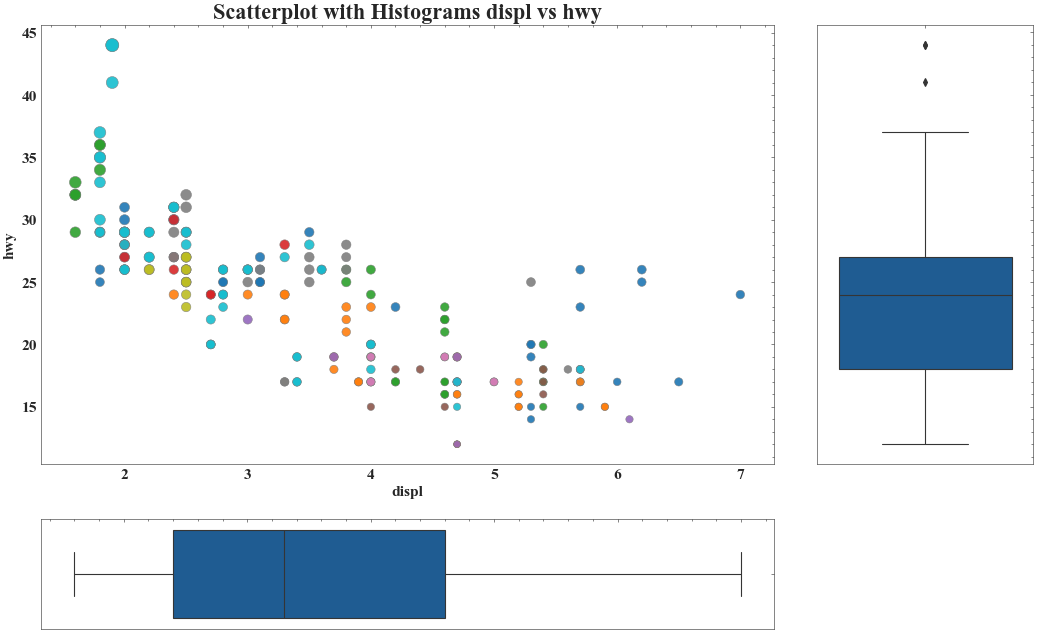

In [69]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ' , 'hwy' , s=df.cty*4, c=df.manufacturer.astype('category' ).cat.codes, 
                alpha=.9, data=df, cmap="tab10", edgecolors= 'gray' , linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel=''  )#f=底部和右面的坐标标签为空
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title= 'Scatterplot with Histograms displ vs hwy' , xlabel= 'displ' , ylabel= 'hwy' )

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

### 8. 相关图
Correlogram用于直观地查看给定数据帧（或2D数组）中所有可能的数值变量对之间的相关度量。

In [17]:
import pandas as pd
df = pd.read_excel('price_train.xlsx')#读取Excel时路径中用\\
df=df.drop(['id'],axis=1) #删除第一列‘id’
print('rows,columns:',df.shape)
df.head()  #显示前五行

rows,columns: (1500, 21)


,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,price
0,1512,0,0.6,1,1,1,54,0.4,134,3,...,220,1838,3366,7,3,11,1,0,1,3
1,614,0,2.9,1,3,1,24,0.2,94,4,...,409,603,1930,13,12,4,1,0,1,1
2,553,0,0.5,1,2,1,23,0.5,119,3,...,993,1517,2981,7,3,14,1,0,0,2
3,718,0,0.7,1,0,1,21,0.8,88,1,...,518,830,1754,17,11,9,1,0,1,1
4,1166,0,1.5,1,0,1,43,0.8,80,4,...,205,603,3993,7,1,7,1,1,0,3


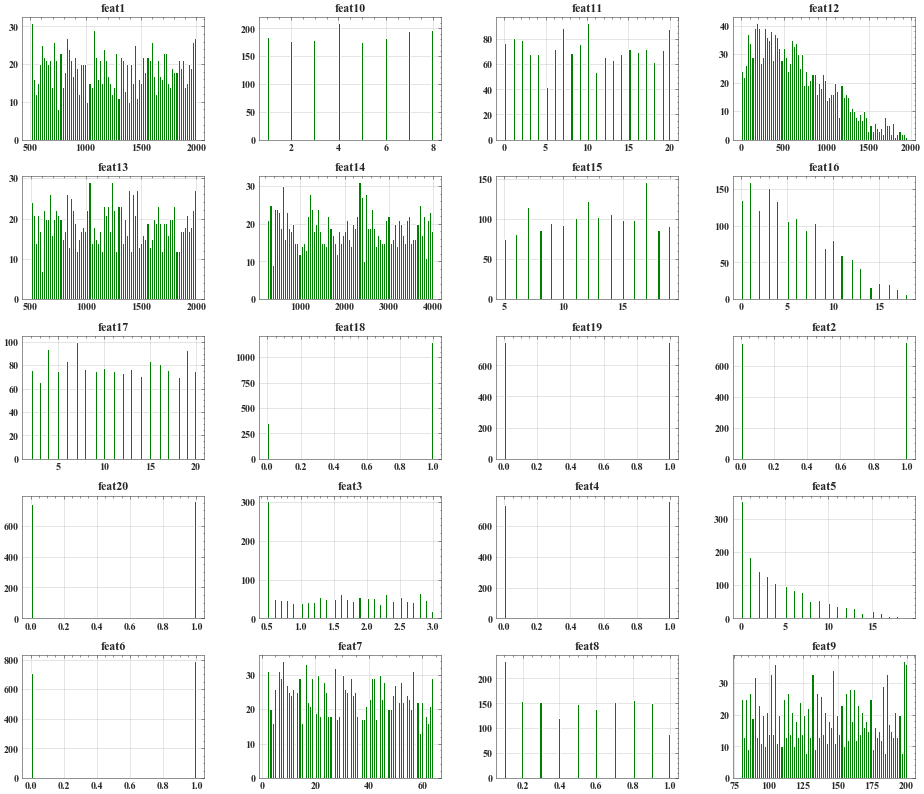

In [19]:
#1.数据可视化-分析各个变量维度分布
def draw(df):#函数绘制各维特征的分布直方图。
    df.hist(figsize=(16,14),color='g',bins=80, density=False)
    #plt.title('各个特征的分布直方图')  # 设置x轴标题
    #plt.savefig("Plots.jpg",dpi=300, pad_inches = 0)
    plt.show()
draw(df.iloc[:,0:20])

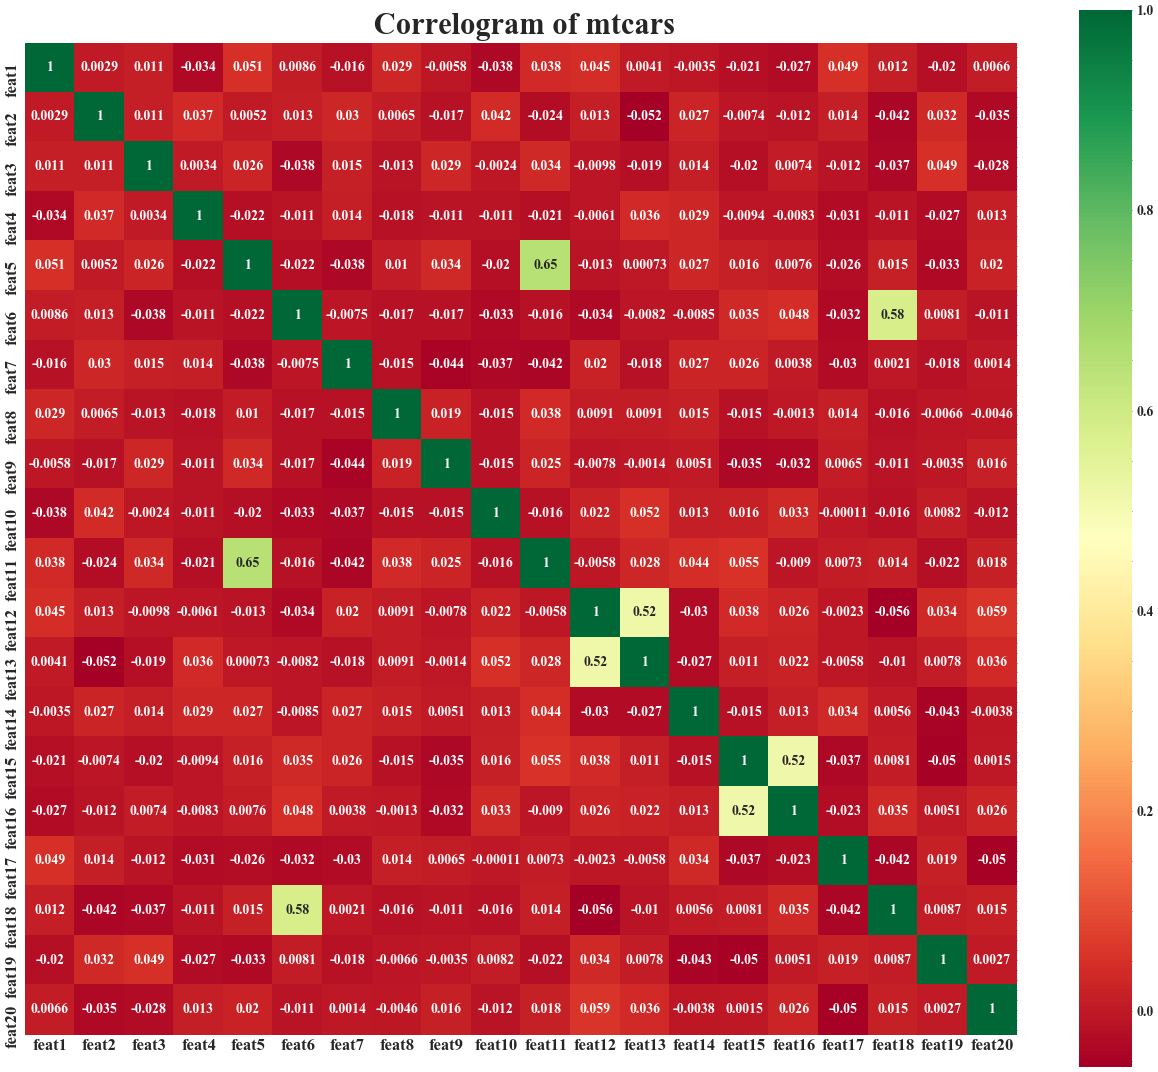

In [20]:
#2.相关性分析
#利用热力图可以看数据表里多个特征两两的相似度。相似度由皮尔逊相关系数度量。
#两个变量之间的皮尔逊相关系数定义为两个变量之间的协方差和标准差的商
from seaborn import heatmap
import seaborn as sns
from sklearn.preprocessing import StandardScaler # 用于进行数据标准化
def draw_heatmap(df):
    ylabels = df.columns.values.tolist() #获得列标签

    ss = StandardScaler()     # 归一化
    data = ss.fit_transform(df)
    dff = pd.DataFrame(data)
    dfData = dff.corr()
    
    plt.subplots(figsize=(16, 14),dpi = 100) # 设置画面大小和分辨率
    sns.heatmap(dfData, annot=True, vmax=1, square=True,yticklabels=ylabels,xticklabels=ylabels, cmap="RdYlGn")# cmap="Greens"
    #plt.savefig('../img/thermodynamicDiagram.jpg')
    plt.title(' Correlogram of mtcars' , fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
draw_heatmap(df.iloc[:,0:20])

### 9. 矩阵图
成对图是探索性分析中的最爱，以理解所有可能的数字变量对之间的关系。它是双变量分析的必备工具。
pairplot
pairplot中pair是成对的意思，pairplot主要展现的是变量两两之间的关系（线性或非线性，有无较为明显的相关关系）

In [44]:
# Load Dataset  
data = sns.load_dataset( 'iris' ) #加载自带的鸢尾花数据集
#为了方便大家观看，把列名换成中文的
# data.rename(columns={"sepal_length":"萼片长",
#                      "sepal_width":"萼片宽",
#                      "petal_length":"花瓣长",
#                      "petal_width":"花瓣宽",
#                      "species":"种类"},inplace=True)
# kind_dict = {
#     "setosa":"山鸢尾",
#     "versicolor":"杂色鸢尾",
#     "virginica":"维吉尼亚鸢尾"
# }
# data["种类"] = data["种类"].map(kind_dict)
data.head(-5) #数据集的内容如下 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica


<Figure size 1600x1600 with 0 Axes>

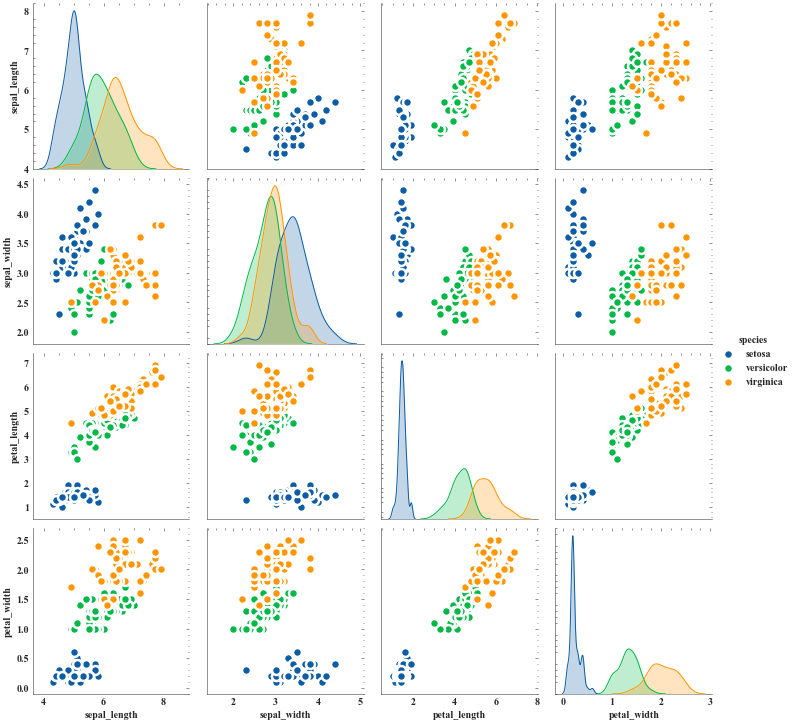

In [49]:
# Plot
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(figsize=(10,80), dpi= 100)
sns.pairplot(data, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.style.use(['science','no-latex'])
#plt.title('pair_matricx plot',fontsize=22)
plt.show()

<Figure size 1000x800 with 0 Axes>

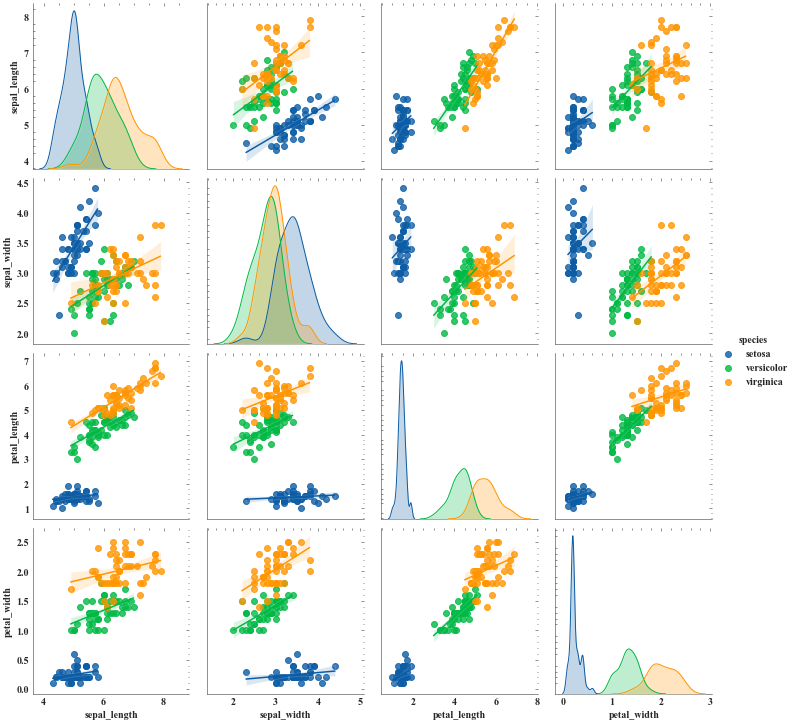

In [51]:
# Load Dataset
irisData= sns.load_dataset( 'iris' )

# Plot
plt.figure(figsize=(10,8), dpi= 100)
sns.pairplot(irisData, kind="reg", hue="species")
plt.show()